[View in Colaboratory](https://colab.research.google.com/github/paulocodigos/ufrn_topicos_avancados/blob/master/regressao_linear_salarios.ipynb)

Salary_Data.csv
('Coefficients: \n', array([9116.11420069]))
Mean squared error: 26392769.69
Variance score: 0.72


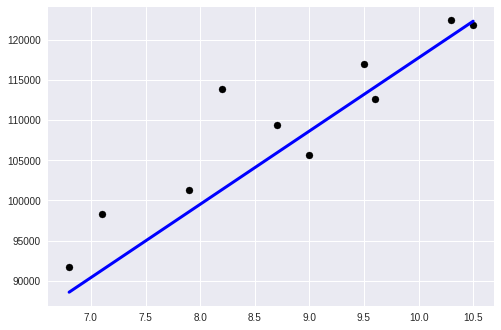

In [15]:
import os
import tarfile
from six.moves import urllib
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv")
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

salary_data = load_data()

# salary_data.head()

# Separando os dados para a variável independente e para variável dependete 
dados_X = salary_data.iloc[:,:-1].values
dados_Y = salary_data.iloc[:, 1].values

# salary_data.describe()


# Split the data into training/testing sets
dados_X_train = dados_X[:-10]
dados_X_test = dados_X[-10:]

 # Split the targets into training/testing sets
dados_y_train = dados_Y[:-10]
dados_y_test = dados_Y[-10:]

 # Create linear regression object
from sklearn.linear_model  import LinearRegression
regr = LinearRegression()

 # Train the model using the training sets
regr.fit(dados_X_train, dados_y_train)

 # Make predictions using the testing set
dados_y_pred = regr.predict(dados_X_test)
  
  
  
   # The coefficients
print('Coefficients: \n', regr.coef_)
    # The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(dados_y_test, dados_y_pred))
    # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(dados_y_test, dados_y_pred))

    # Plot outputs
plt.scatter(dados_X_test, dados_y_test,  color='black')
plt.plot(dados_X_test, dados_y_pred, color='blue', linewidth=3)

